## Ads Clicking Predic

In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [687]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [688]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [689]:
df.shape

(400, 5)

In [690]:
from sklearn.preprocessing import LabelEncoder

In [691]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [692]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [693]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [694]:
data = df.sample(frac=0.9, random_state=42)

In [695]:
test = df.drop(data.index)

In [696]:
data.reset_index(drop=True).head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15697424,0,46,22000,0
1,15609669,0,59,88000,1
2,15776733,0,28,44000,0
3,15724536,0,48,96000,1
4,15699284,0,29,28000,0


In [697]:
test.reset_index(drop=True).head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15649487,1,45,22000,1
1,15736760,0,47,49000,1
2,15727696,1,30,135000,1
3,15694395,0,24,32000,0
4,15654901,0,27,58000,0


### EDA

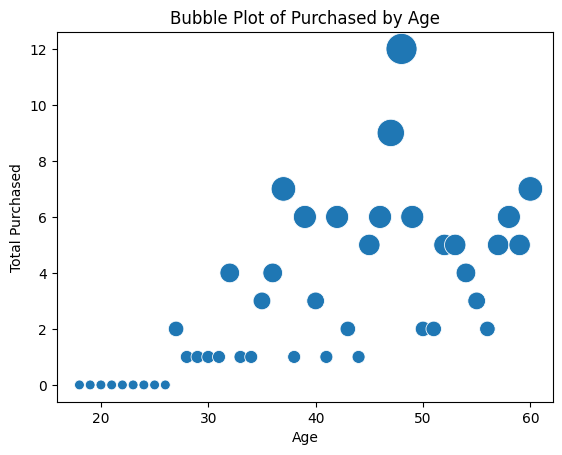

In [698]:
age_sum = data.groupby('Age')['Purchased'].sum().reset_index()

sns.scatterplot(
    data=age_sum,
    x='Age',
    y='Purchased',
    size='Purchased',
    legend=False,
    sizes=(50, 500)
)

plt.xlabel('Age')
plt.ylabel('Total Purchased')
plt.title('Bubble Plot of Purchased by Age')
plt.show()

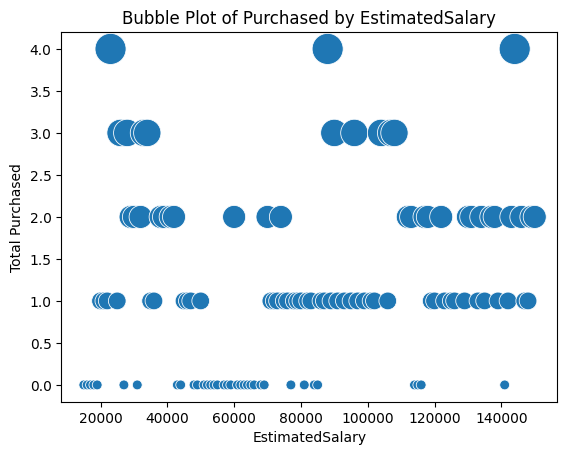

In [699]:
EstimatedSalary_sum = data.groupby('EstimatedSalary')['Purchased'].sum().reset_index()

sns.scatterplot(
    data=EstimatedSalary_sum,
    x='EstimatedSalary',
    y='Purchased',
    size='Purchased',
    legend=False,
    sizes=(50, 500)
)

plt.xlabel('EstimatedSalary')
plt.ylabel('Total Purchased')
plt.title('Bubble Plot of Purchased by EstimatedSalary')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

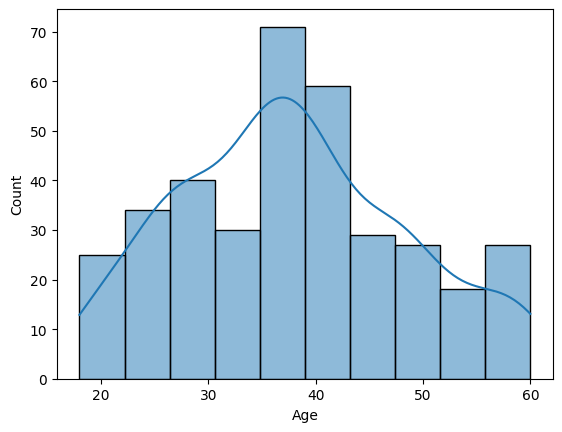

In [717]:
sns.histplot(data['Age'], kde=True)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

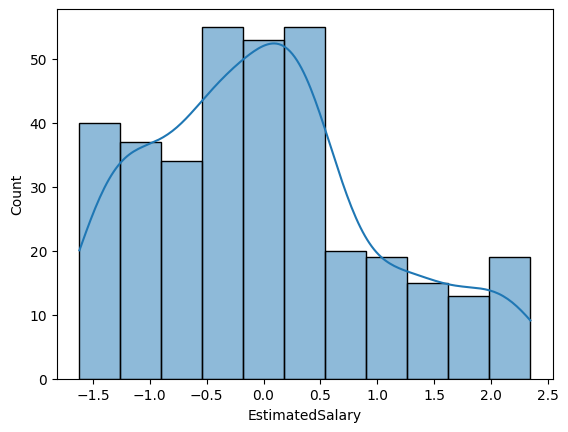

In [718]:
sns.histplot(data['EstimatedSalary'], kde=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'User ID'),
  Text(1.5, 0, 'Gender'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'EstimatedSalary'),
  Text(4.5, 0, 'Purchased')])

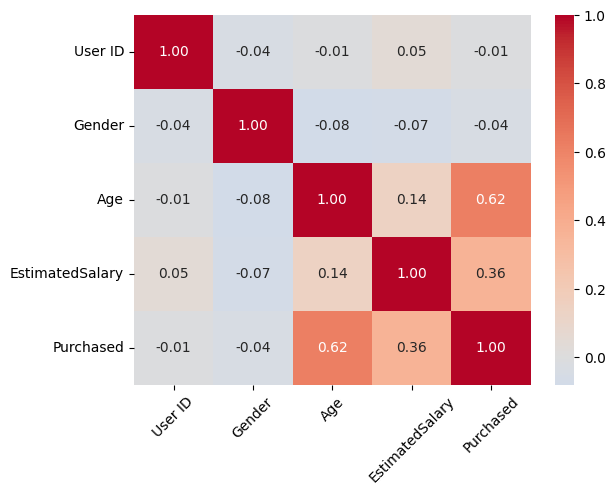

In [701]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm',annot=True, fmt=".2f", center=0)
plt.xticks(rotation=45)

In [702]:
data['Age'] = data['Age']

In [703]:
from sklearn.preprocessing import StandardScaler

In [704]:
scaler = StandardScaler()
data['EstimatedSalary'] = scaler.fit_transform(data[['EstimatedSalary']])

In [705]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
209,15697424,0,46,-1.413320,0
280,15609669,0,59,0.525171,1
33,15776733,0,28,-0.767156,0
210,15724536,0,48,0.760140,1
93,15699284,0,29,-1.237093,0


#### Models + f1 score

In [706]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [707]:
y = data['Purchased']
X = data.drop(['Purchased', 'User ID'], axis = 1)

In [708]:
X_train  ,X_test , y_train , y_test = train_test_split(X, y, test_size = 0.3 , random_state = 42)

##### LogisticRegression

In [709]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [710]:
y_pred = lr.predict(X_test)

In [711]:
f1 = f1_score(y_test,y_pred)
print(f1)

0.8210526315789474


##### Random Forest Classifier

In [712]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state=42)
rf.fit(X_train,y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [713]:
y_pred = rf.predict(X_test)

In [714]:
f1 = f1_score(y_test,y_pred)
print(f1)

0.9423076923076923


### Final Test

In [715]:
test_data = test.drop(['Purchased','User ID'], axis = 1).copy()

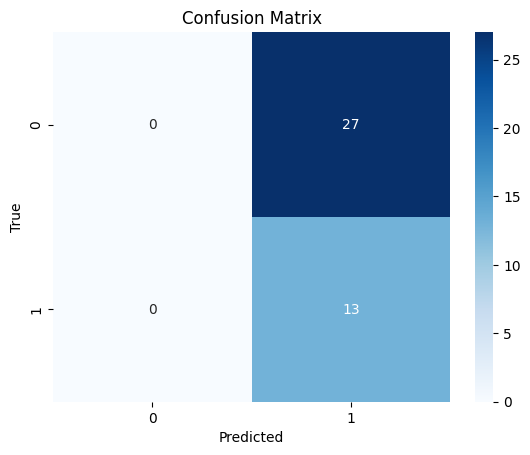

In [716]:
model = RandomForestClassifier(n_estimators=150,random_state=42)
model.fit(X,y)
pred = model.predict(test_data)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['Purchased'], pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()